In [1]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Authentication
consumerKey = "I0NcEqHFSphjZ6WsxgcV9Ki6o"
consumerSecret = "SPUx69Cskqf8XJ2P9aogyOAmZCAKHbRxuqAy9S9fG99cgRwno2"
accessToken = "1270740046639820800-Jo7nfHpodPtG1UEl9wOsvAlErgdKMx"
accessTokenSecret = "ObeRQ0aWOnPFZZKePI4WpGab9rcxHsEyp5T89QjDFMRAi"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []  
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: elon musk
Please enter how many tweets to analyze: 100


In [4]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  37
negative number:  31
neutral number:  32


In [5]:
tweet_list

,0
0,RT @TheOnion: Elon Musk To Cut Twitter Staff T...
1,"RT @EmmaRincon: Elon Musk: ""La extrema izquier..."
2,"RT @DeplorableHank1: Elon Musk:\n\n""Almost eve..."
3,RT @KimDotcom: Elon Musk is a whistleblower wh...
4,RT @cocora93: Jamás he visto tantos fallos y c...
...,...
95,RT @KimDotcom: Elon Musk is a whistleblower wh...
96,RT @MattWallace888: Elon Musk is running Twitt...
97,RT @itsJeffTiedrich: Elon Musk refusing to acc...
98,"Elon Musk's Twitter, home of ""free speech abso..."


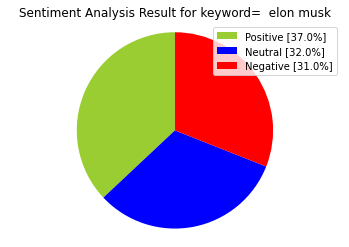

In [6]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [7]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [8]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @TheOnion: Elon Musk To Cut Twitter Staff T...,RT @TheOnion: Elon Musk To Cut Twitter Staff T...
1,"RT @EmmaRincon: Elon Musk: ""La extrema izquier...","RT @EmmaRincon: Elon Musk: ""La extrema izquier..."
2,"RT @DeplorableHank1: Elon Musk:\n\n""Almost eve...","RT @DeplorableHank1: Elon Musk:\n\n""Almost eve..."
3,RT @KimDotcom: Elon Musk is a whistleblower wh...,RT @KimDotcom: Elon Musk is a whistleblower wh...
4,RT @cocora93: Jamás he visto tantos fallos y c...,RT @cocora93: Jamás he visto tantos fallos y c...
5,RT @f_philippot: Les révélations explosives d’...,RT @f_philippot: Les révélations explosives d’...
7,Elon Musk Should Buy #XRP As A Big Fuck You To...,Elon Musk Should Buy #XRP As A Big Fuck You To...
9,RT @aintscarylarry: Elon Musk’s twitter 2.0 ju...,RT @aintscarylarry: Elon Musk’s twitter 2.0 ju...
10,RT @WalkerBragman: COVID minimizer and writer ...,RT @WalkerBragman: COVID minimizer and writer ...
11,RT @MattWallace888: Elon Musk is against the g...,RT @MattWallace888: Elon Musk is against the g...


In [9]:
tweet_list

,0,text
0,RT @TheOnion: Elon Musk To Cut Twitter Staff T...,RT @TheOnion: Elon Musk To Cut Twitter Staff T...
1,"RT @EmmaRincon: Elon Musk: ""La extrema izquier...","RT @EmmaRincon: Elon Musk: ""La extrema izquier..."
2,"RT @DeplorableHank1: Elon Musk:\n\n""Almost eve...","RT @DeplorableHank1: Elon Musk:\n\n""Almost eve..."
3,RT @KimDotcom: Elon Musk is a whistleblower wh...,RT @KimDotcom: Elon Musk is a whistleblower wh...
4,RT @cocora93: Jamás he visto tantos fallos y c...,RT @cocora93: Jamás he visto tantos fallos y c...
5,RT @f_philippot: Les révélations explosives d’...,RT @f_philippot: Les révélations explosives d’...
7,Elon Musk Should Buy #XRP As A Big Fuck You To...,Elon Musk Should Buy #XRP As A Big Fuck You To...
9,RT @aintscarylarry: Elon Musk’s twitter 2.0 ju...,RT @aintscarylarry: Elon Musk’s twitter 2.0 ju...
10,RT @WalkerBragman: COVID minimizer and writer ...,RT @WalkerBragman: COVID minimizer and writer ...
11,RT @MattWallace888: Elon Musk is against the g...,RT @MattWallace888: Elon Musk is against the g...


In [10]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @TheOnion: Elon Musk To Cut Twitter Staff T...,elon musk to cut twitter staff to single devo...
1,"RT @EmmaRincon: Elon Musk: ""La extrema izquier...",elon musk la extrema izquierda odia a todo ...
2,"RT @DeplorableHank1: Elon Musk:\n\n""Almost eve...",elon musk almost every conspiracy theory t...
3,RT @KimDotcom: Elon Musk is a whistleblower wh...,elon musk is a whistleblower who paid 44 bil...
4,RT @cocora93: Jamás he visto tantos fallos y c...,jam s he visto tantos fallos y caos en esta r...
5,RT @f_philippot: Les révélations explosives d’...,les r v lations explosives d elon musk sur la...
7,Elon Musk Should Buy #XRP As A Big Fuck You To...,elon musk should buy xrp as a big fuck you to...
9,RT @aintscarylarry: Elon Musk’s twitter 2.0 ju...,elon musk s twitter 2 0 just told me that i h...
10,RT @WalkerBragman: COVID minimizer and writer ...,covid minimizer and writer david zweig who e...
11,RT @MattWallace888: Elon Musk is against the g...,elon musk is against the government forcing 2...


In [11]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @TheOnion: Elon Musk To Cut Twitter Staff T...,elon musk to cut twitter staff to single devo...,-0.535714,0.607143,positive,0.088,0.667,0.246,0.5859
1,"RT @EmmaRincon: Elon Musk: ""La extrema izquier...",elon musk la extrema izquierda odia a todo ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,"RT @DeplorableHank1: Elon Musk:\n\n""Almost eve...",elon musk almost every conspiracy theory t...,0.350000,0.650000,negative,0.157,0.703,0.141,-0.0828
3,RT @KimDotcom: Elon Musk is a whistleblower wh...,elon musk is a whistleblower who paid 44 bil...,0.000000,0.500000,positive,0.117,0.515,0.368,0.7430
4,RT @cocora93: Jamás he visto tantos fallos y c...,jam s he visto tantos fallos y caos en esta r...,0.016667,0.033333,neutral,0.000,1.000,0.000,0.0000
5,RT @f_philippot: Les révélations explosives d’...,les r v lations explosives d elon musk sur la...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,Elon Musk Should Buy #XRP As A Big Fuck You To...,elon musk should buy xrp as a big fuck you to...,-0.166667,0.433333,negative,0.241,0.759,0.000,-0.5423
9,RT @aintscarylarry: Elon Musk’s twitter 2.0 ju...,elon musk s twitter 2 0 just told me that i h...,-0.500000,0.300000,negative,0.143,0.857,0.000,-0.5423
10,RT @WalkerBragman: COVID minimizer and writer ...,covid minimizer and writer david zweig who e...,0.150000,0.650000,neutral,0.000,1.000,0.000,0.0000
11,RT @MattWallace888: Elon Musk is against the g...,elon musk is against the government forcing 2...,0.000000,0.000000,positive,0.000,0.865,0.135,0.3612


In [12]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [13]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [14]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,21,35.00
negative,20,33.33
positive,19,31.67


In [15]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


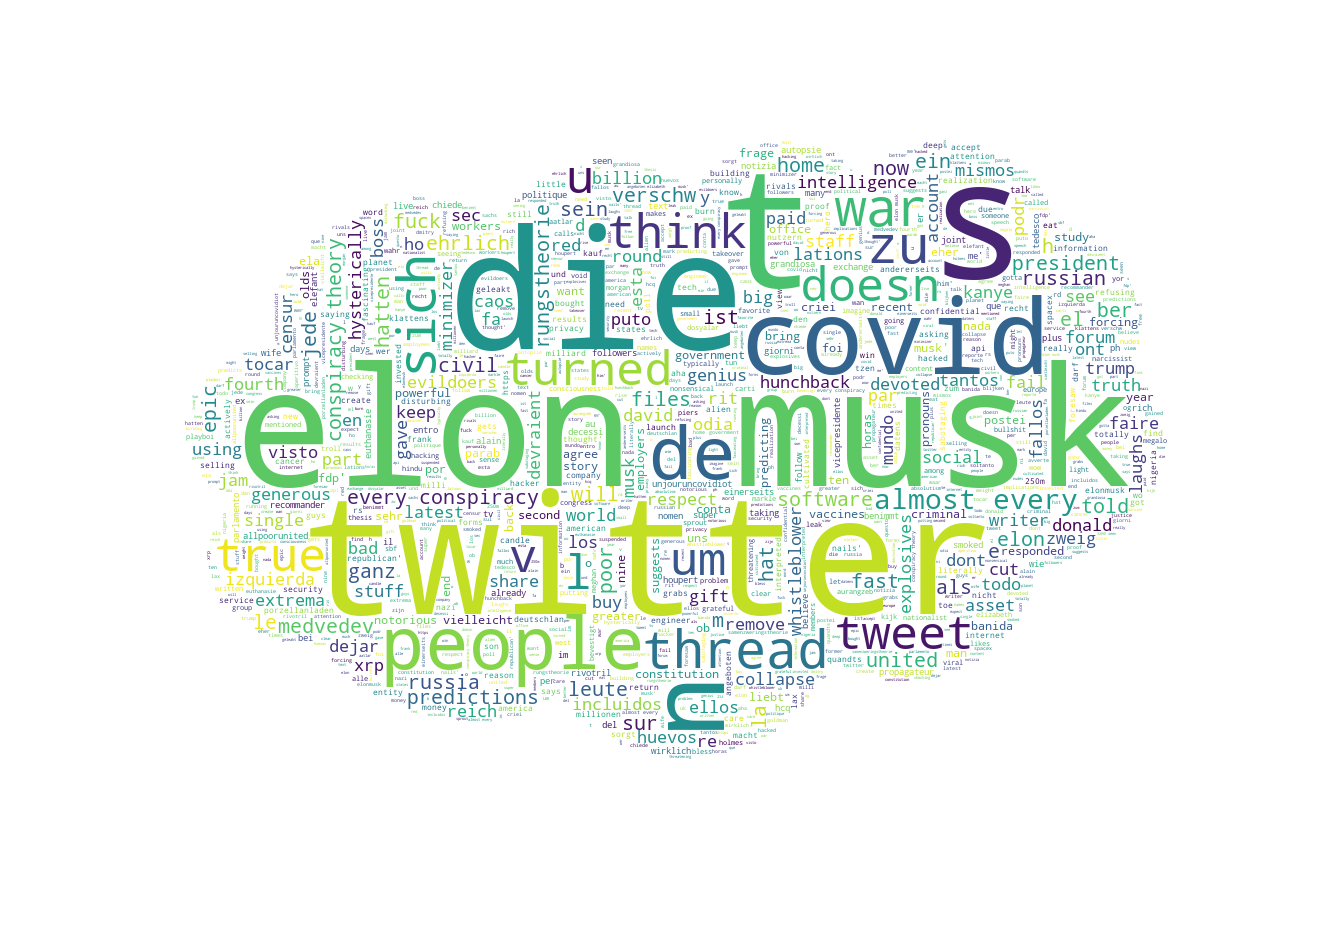

In [16]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


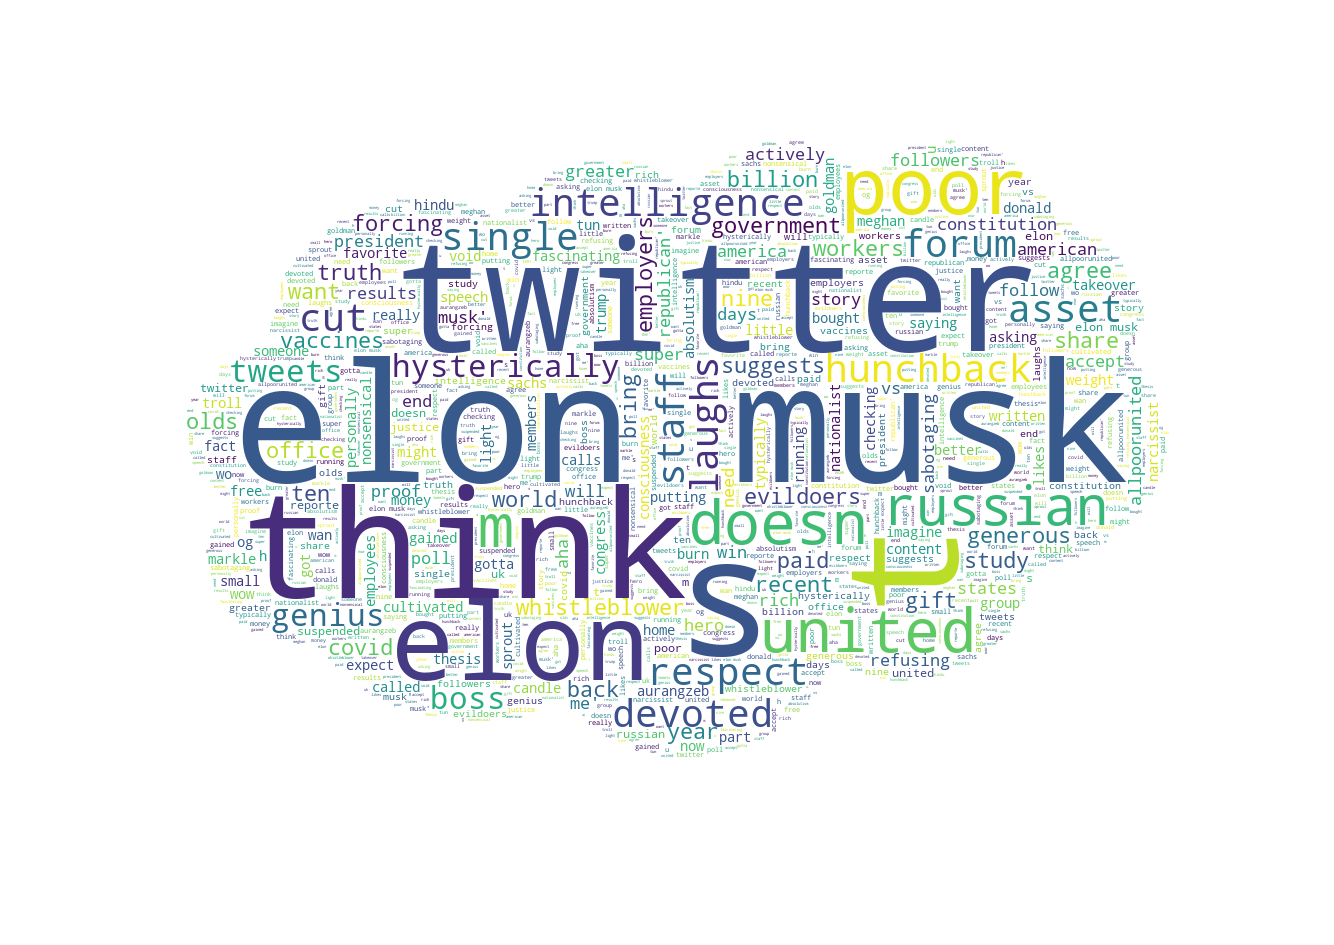

In [17]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


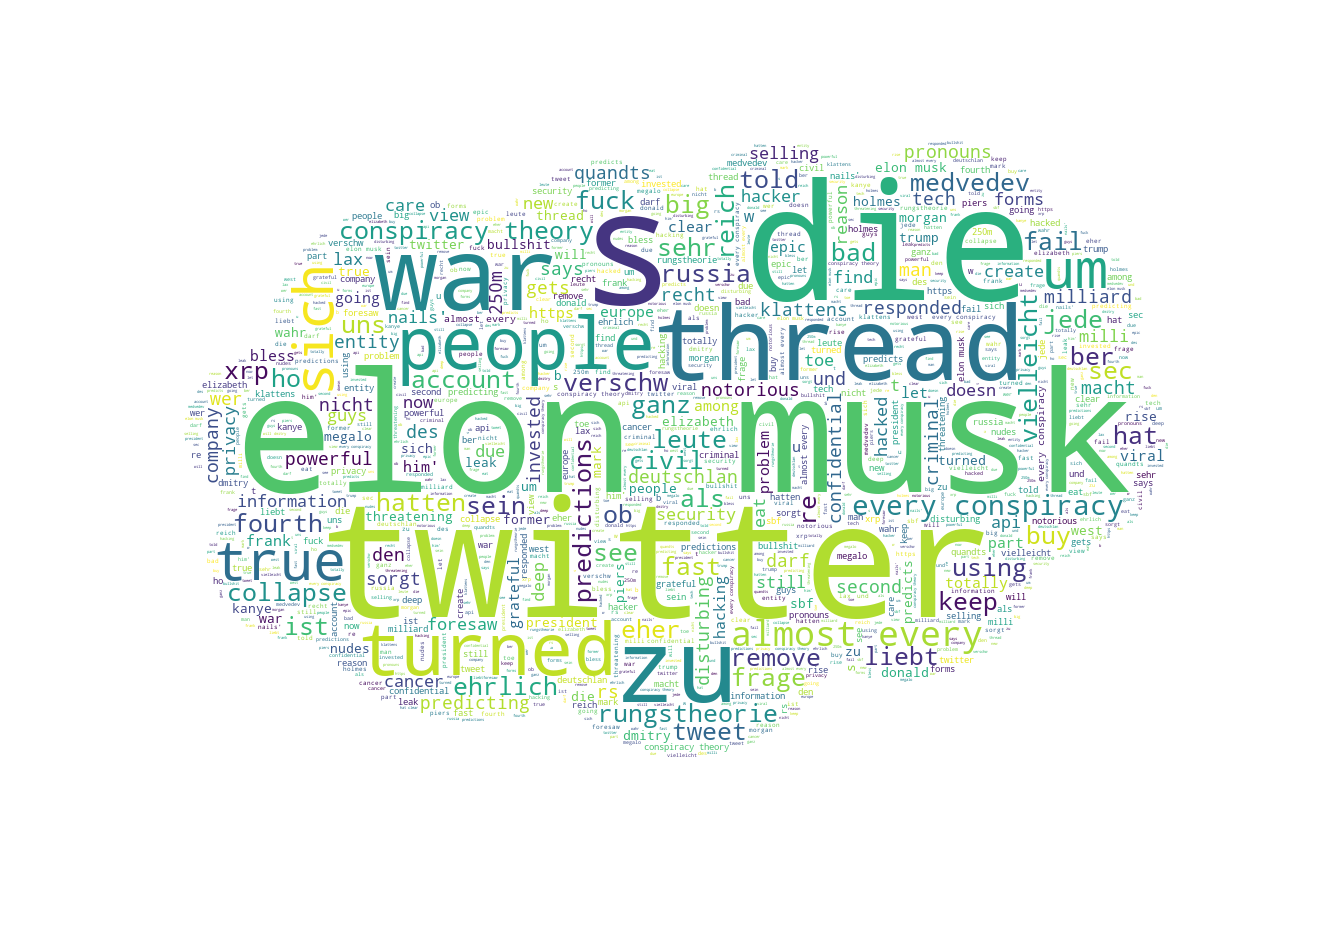

In [18]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


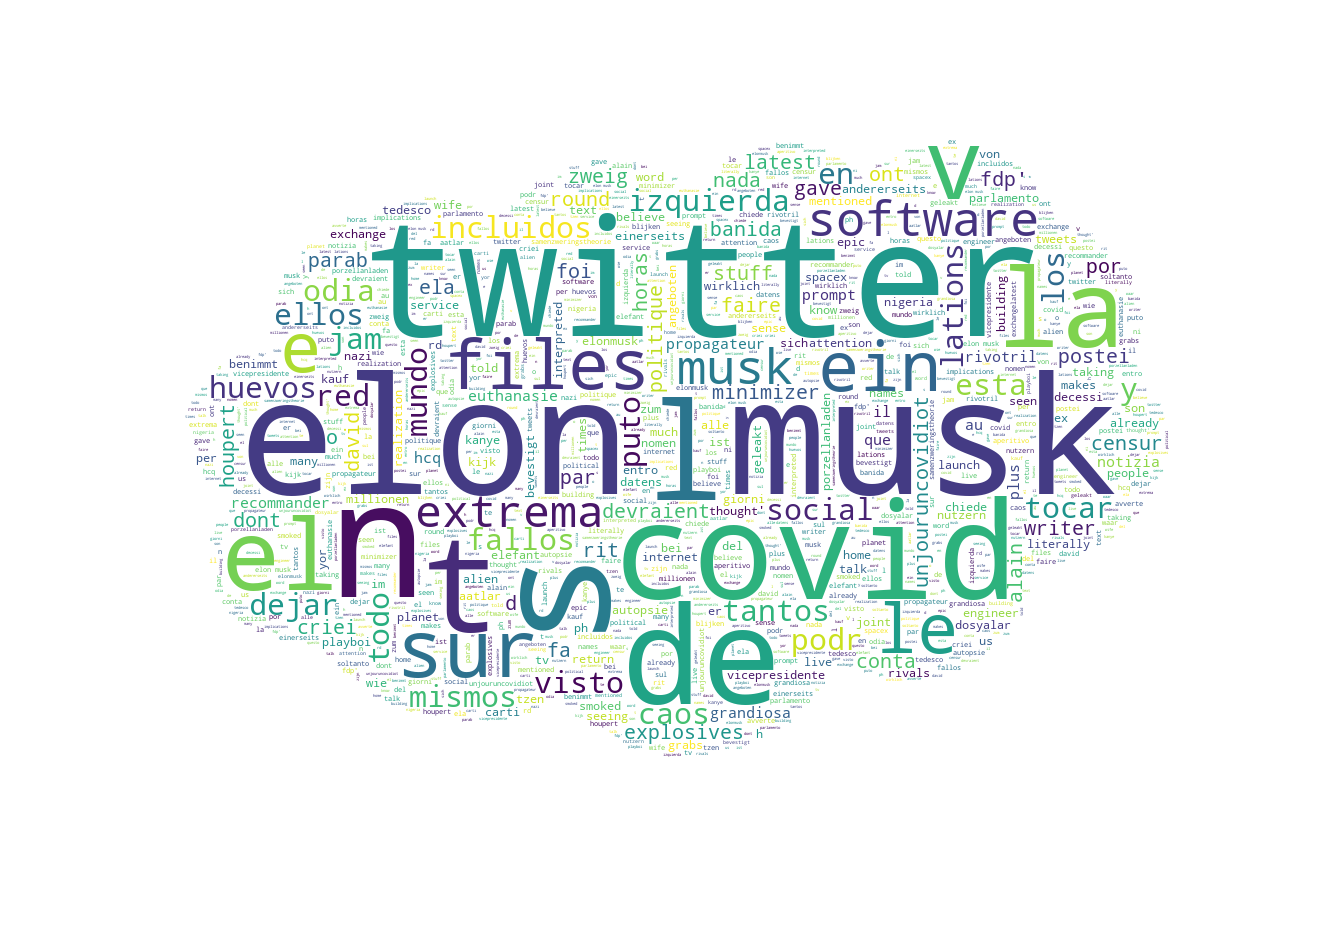

In [19]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [20]:
#Calculating tweet's length and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [21]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,107.20
neutral,91.76
positive,107.26


In [22]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,19.80
neutral,15.57
positive,19.21
